# Задание
Требуется выполнить следующие действия<cite data-cite="ue:dz"></cite>:

1. Поиск и выбор набора данных для&nbsp;построения моделей машинного обучения. На&nbsp;основе выбранного набора данных студент должен построить модели машинного обучения для&nbsp;решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для&nbsp;понимания структуры данных. Анализ и заполнение пропусков в&nbsp;данных.
3. Выбор признаков, подходящих для&nbsp;построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о&nbsp;возможности построения моделей машинного обучения. В&nbsp;зависимости от&nbsp;набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для&nbsp;последующей оценки качества моделей. Необходимо выбрать не&nbsp;менее двух метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для&nbsp;решения задачи классификации или регрессии. Необходимо использовать не&nbsp;менее трех моделей, хотя бы одна из&nbsp;которых должна быть ансамблевой.
7. Формирование обучающей и тестовой выборок на&nbsp;основе исходного набора данных.
8. Построение базового решения (baseline) для&nbsp;выбранных моделей без&nbsp;подбора гиперпараметров. Производится обучение моделей на&nbsp;основе обучающей выборки и оценка качества моделей на&nbsp;основе тестовой выборки.
9. Подбор гиперпараметров для&nbsp;выбранных моделей. Рекомендуется подбирать не&nbsp;более 1-2 гиперпараметров. Рекомендуется использовать методы кросс-валидации. В&nbsp;зависимости от&nbsp;используемой библиотеки можно применять функцию `GridSearchCV`, использовать перебор параметров в&nbsp;цикле, или использовать другие методы.
10. Повторение пункта 8 для&nbsp;найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с&nbsp;качеством baseline-моделей.
11. Формирование выводов о&nbsp;качестве построенных моделей на&nbsp;основе выбранных метрик.

# Ход выполнения работы

In [14]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz, plot_tree

# Enable inline plots
%matplotlib inline

# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

## Выбор набора данных



In [3]:
dat = pd.read_csv("/Users/elizavetasukach/Desktop/MachineLearning/2019.csv")

## Проведение разведочного анализа данных

In [4]:
dat.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [5]:
dat

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


Значения колонки Country or region уникальны, поэтому ее можно удалить, если заменить на цифровые значения, то значения колонки Overall rank продублируются

In [6]:
del dat['Country or region']

Проверим пустые значения:

In [8]:
dat.isnull().sum()

Overall rank                    0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

С&nbsp;такими данными уже можно работать. Проверим размер набора данных:

In [9]:
dat.shape

(156, 8)

Проверим основные статистические характеристики набора данных:

In [11]:
dat.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


### Визуальное исследование датасета

Оценим распределение целевого признака — Score:

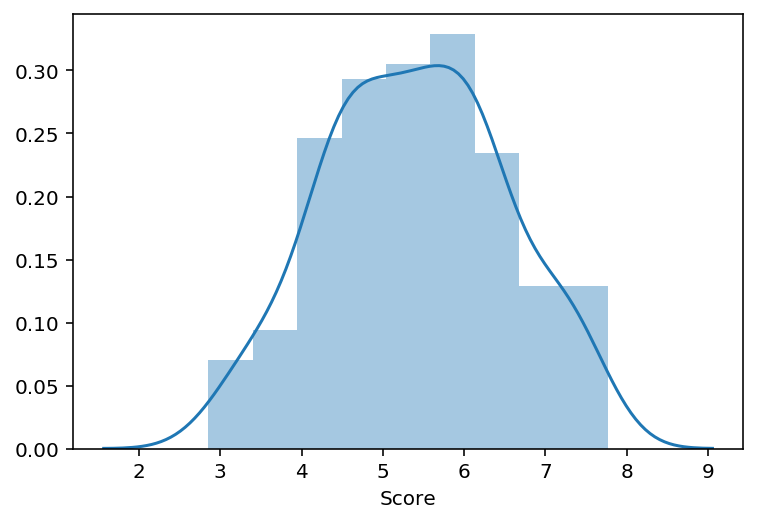

In [15]:
sns.distplot(dat["Score"]);

In [ ]:
Видно нормальное распределение
Зависимость социальной поддержки от Счета:

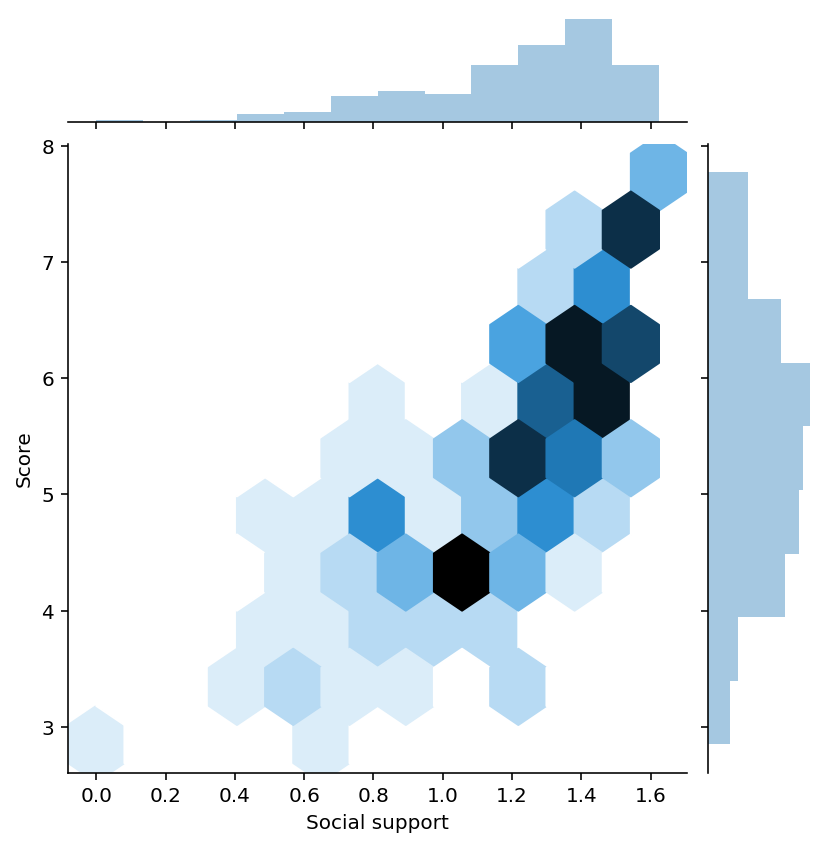

In [17]:
sns.jointplot(x="Social support", y="Score", data=dat, kind="hex");

Можно сделать вывод о прямой зависимости 

Зависимость свободы жизненного выбора от счета:

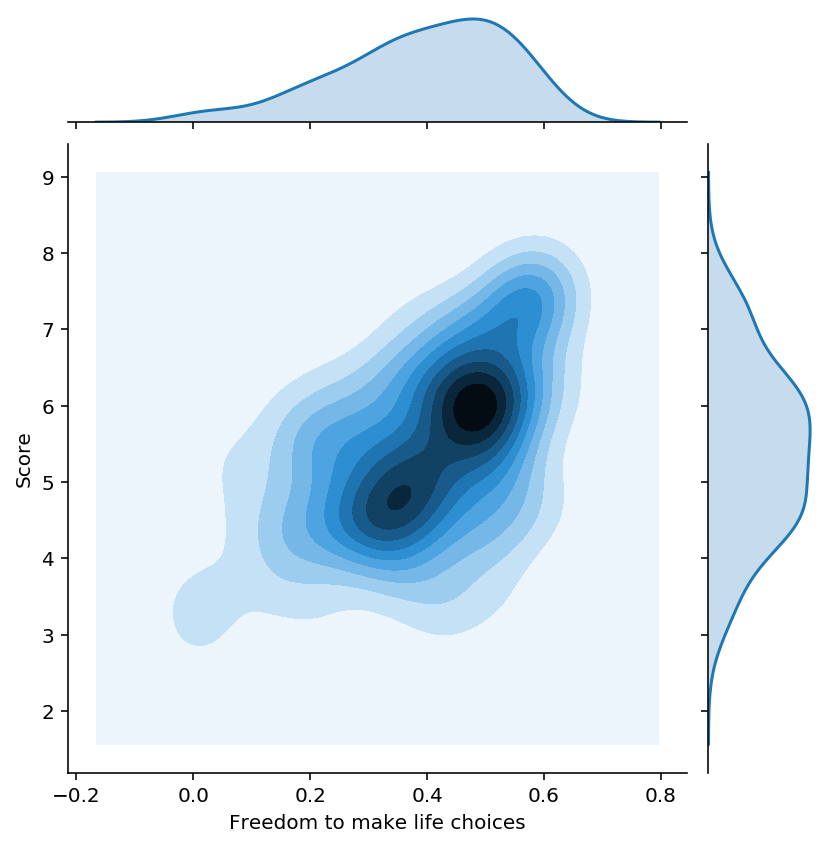

In [20]:
sns.jointplot(x="Freedom to make life choices", y="Score", data=dat, kind="kde");

Зависимость не такая яркая, но видно, что тоже прямая

Построим парные диаграммы по&nbsp;всем показателям по&nbsp;исходному набору данных:

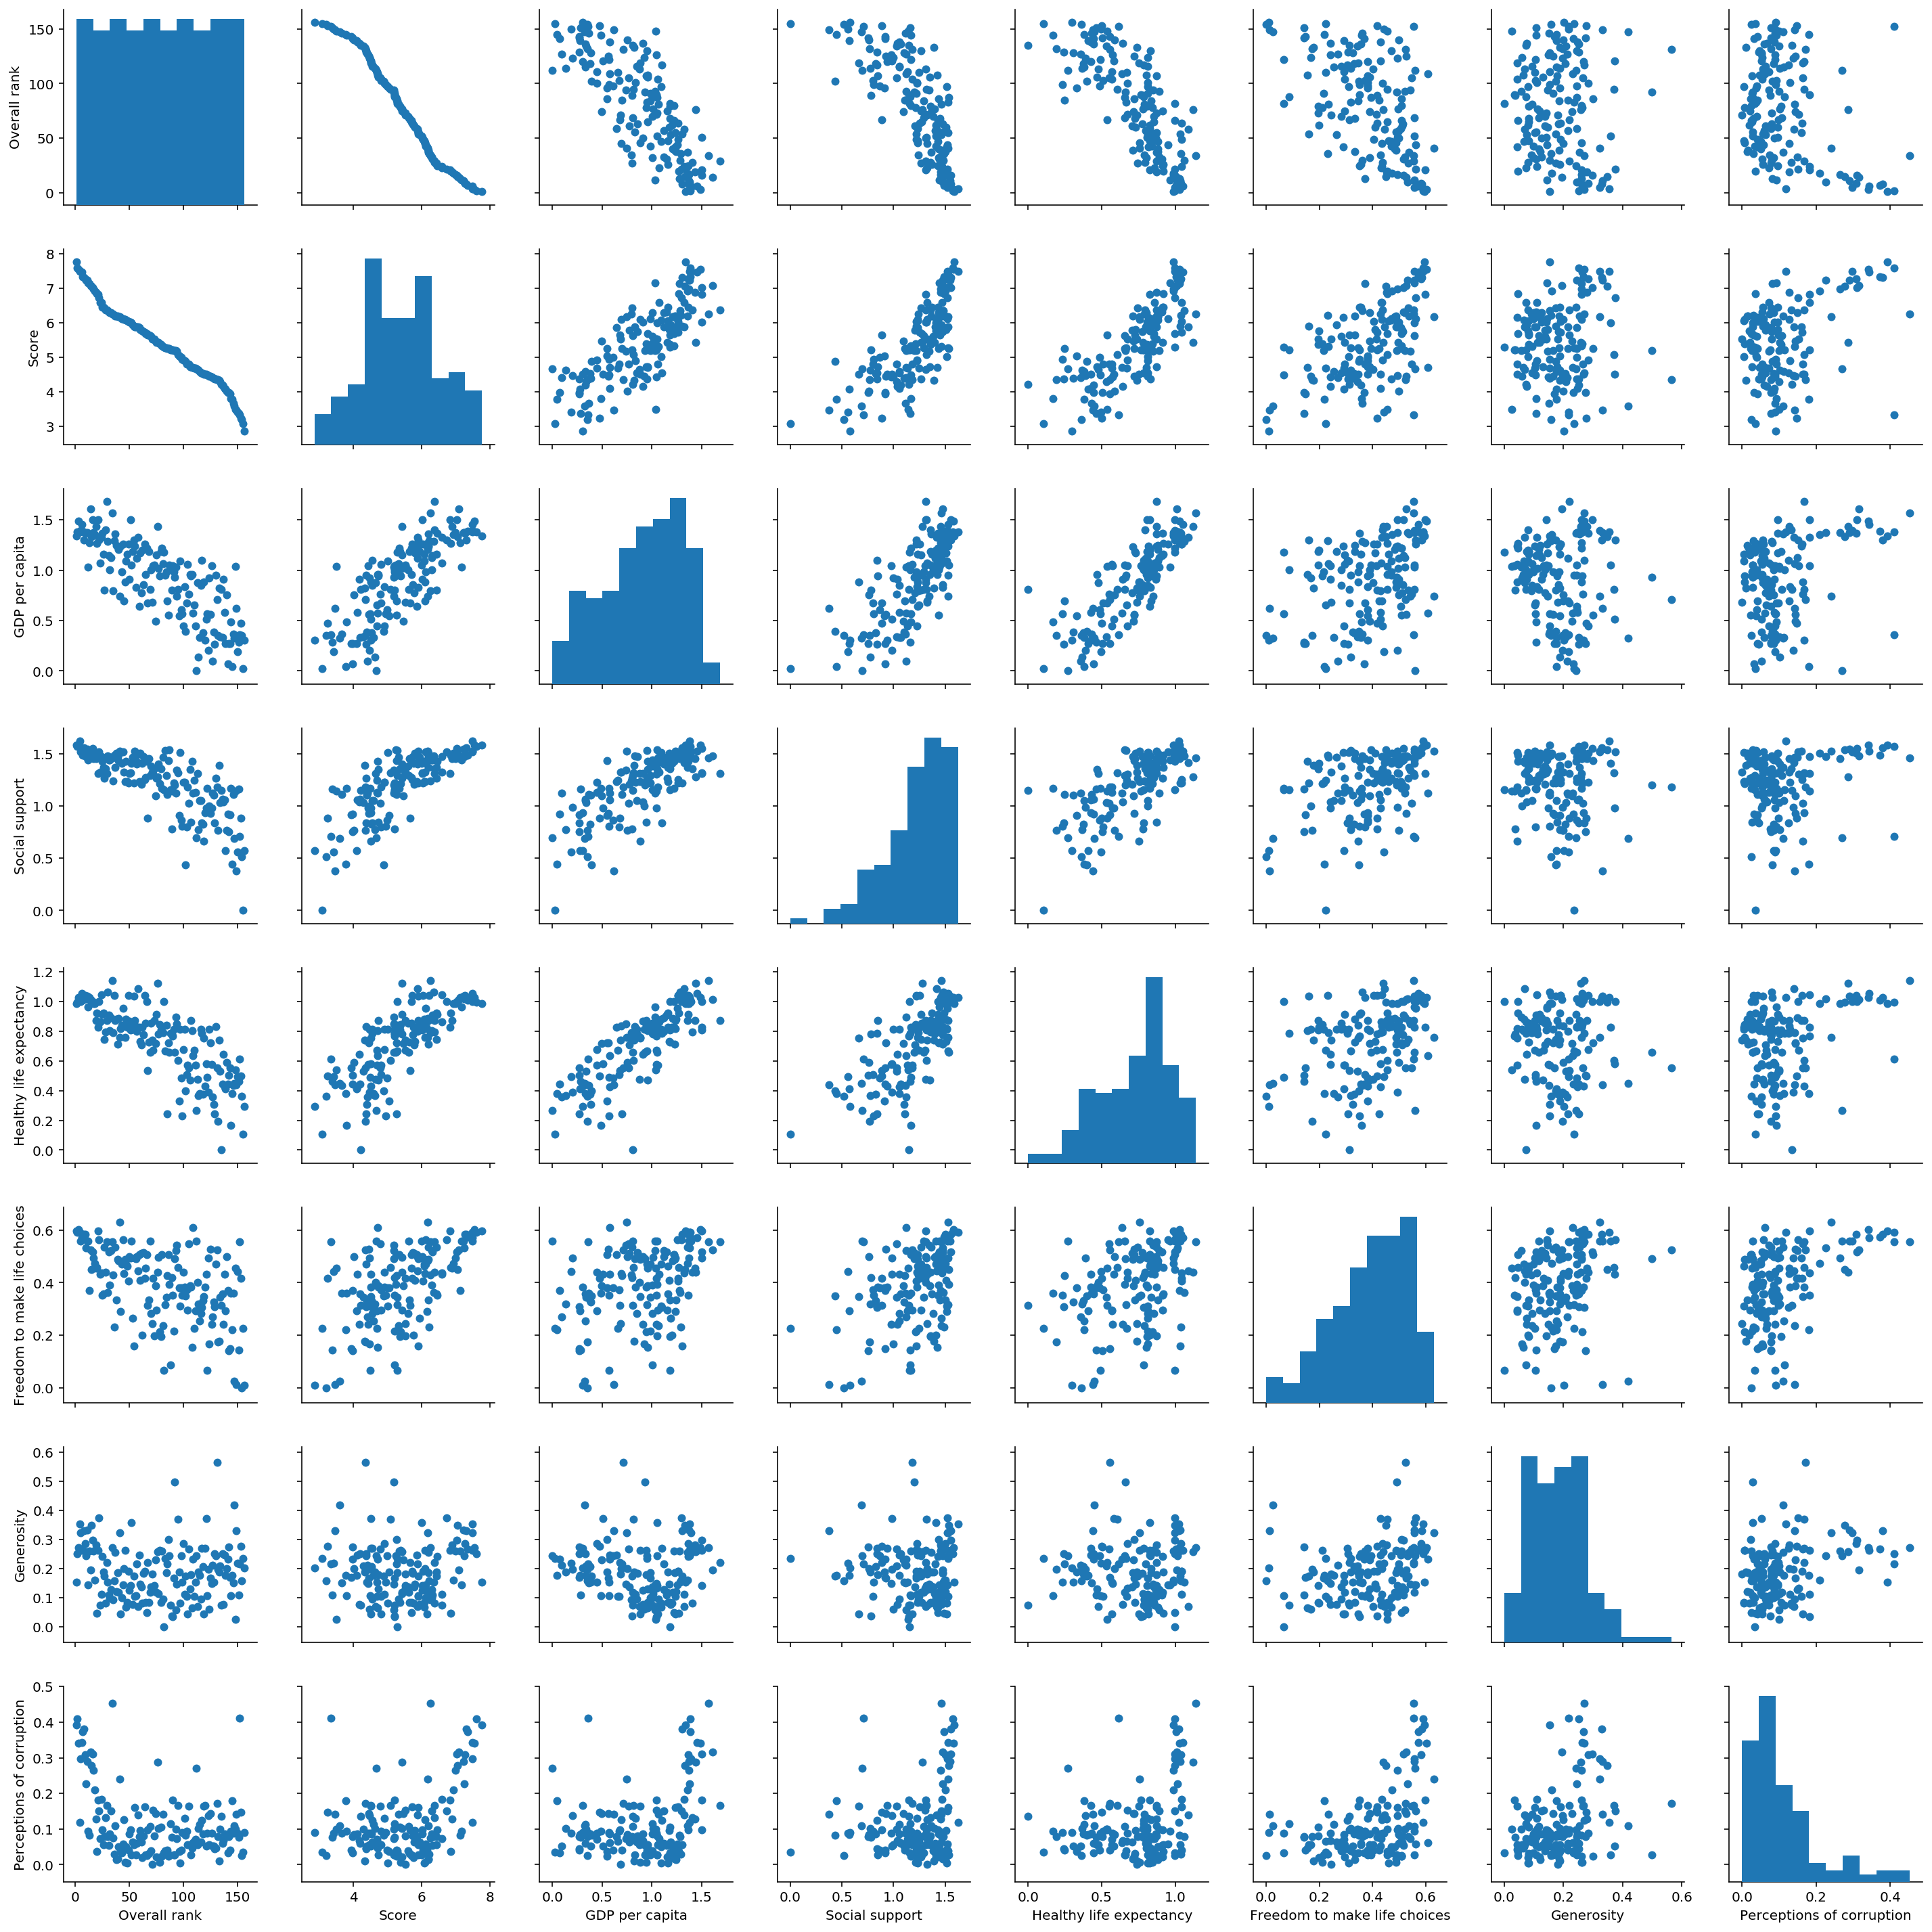

In [21]:
sns.pairplot(dat, plot_kws=dict(linewidth=0));

Видно, что много прямых и обратных зависимостей, так как показатели точно влияют на счет страны в рейтинге.

### Корреляционный анализ

Построим корреляционную матрицу по всему набору данных:

In [22]:
dat.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


Визуализируем корреляционную матрицу с&nbsp;помощью тепловой карты:

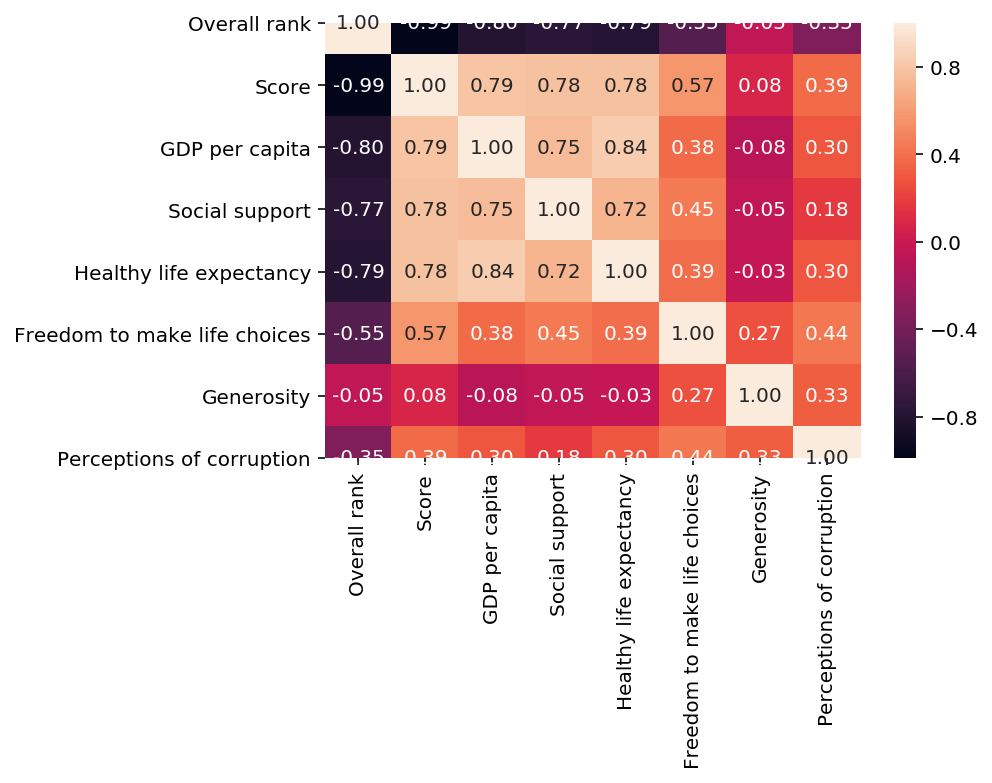

In [23]:
sns.heatmap(dat.corr(), annot=True, fmt=".2f");

Видная сильная зависимость между Score и Overall rank (что логично, чем больше счет, тем выше в рейтинге, обратная зависимость), и сильная зависимость между целевым признаком и GDP per capita, Social support, Healthy life expectancy. Слабая зависимость между целевым признаком и Generosity.

## Подготовка данных для обучения моделей
Разделим данные на&nbsp;целевой столбец и признаки:

In [24]:
X = dat.drop("Score", axis=1)
y = dat["Score"]

In [25]:
print(X.head(), "\n")
print(y.head())

Overall rank  GDP per capita  Social support  Healthy life expectancy  \
0             1           1.340           1.587                    0.986   
1             2           1.383           1.573                    0.996   
2             3           1.488           1.582                    1.028   
3             4           1.380           1.624                    1.026   
4             5           1.396           1.522                    0.999   

   Freedom to make life choices  Generosity  Perceptions of corruption  
0                         0.596       0.153                      0.393  
1                         0.592       0.252                      0.410  
2                         0.603       0.271                      0.341  
3                         0.591       0.354                      0.118  
4                         0.557       0.322                      0.298   

0    7.769
1    7.600
2    7.554
3    7.494
4    7.488
Name: Score, dtype: float64


In [26]:
print(X.shape)
print(y.shape)

(156, 7)
(156,)


Предобработаем данные, чтобы методы работали лучше:

In [27]:
from sklearn.preprocessing import StandardScaler

columns = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X, columns=columns).describe()

,Overall rank,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02
mean,0.000000,1.779204e-16,-1.195625e-16,-3.188333e-16,-2.391250e-16,2.005162e-16,-3.914248e-18
std,1.003221,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00
min,-1.720983,-2.279334e+00,-4.053282e+00,-3.004986e+00,-2.748526e+00,-1.946801e+00,-1.173697e+00
25%,-0.860492,-7.614944e-01,-5.132402e-01,-7.354299e-01,-5.921083e-01,-8.014454e-01,-6.749404e-01
50%,0.000000,1.381292e-01,2.101925e-01,2.641694e-01,1.710395e-01,-7.736976e-02,-2.663845e-01
75%,0.860492,8.243362e-01,8.171048e-01,6.484713e-01,8.029119e-01,6.677699e-01,3.252258e-01
max,1.720983,1.961299e+00,1.392163e+00,1.722652e+00,1.669330e+00,4.014316e+00,3.633468e+00


## Выбор метрик

Напишем функцию, которая считает метрики построенной модели:

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

def test_model(model):
    print("mean_absolute_error:",
          mean_absolute_error(y_test, model.predict(X_test)))
    print("median_absolute_error:",
          median_absolute_error(y_test, model.predict(X_test)))
    print("r2_score:",
          r2_score(y_test, model.predict(X_test)))

Очевидно, что все эти метрики подходят для&nbsp;задачи регрессии. При&nbsp;этом средняя абсолютная ошибка (`mean_absolute_error`) будет показывать, насколько в&nbsp;среднем мы ошибаемся, медианная абсолютная ошибка (`median_absolute_error`) — насколько мы ошибаемся на&nbsp;половине выборки, а коэффициент детерминации $R^2$ (`r2_score`) хорош тем, что он показывает качество модели машинного обучения в&nbsp;задачи регрессии без&nbsp;сравнения с&nbsp;другими моделями.

## Выбор моделей
В качестве моделей машинного обучения выберем хорошо показавшие себя в&nbsp;лабораторных работах модели:

* Метод $k$ ближайших соседей (`KNeighborsRegressor`)
* Дерево решений (`DecisionTreeRegressor`)
* Случайный лес (`RandomForestRegressor`)

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Формирование обучающей и тестовой выборок

Разделим выборку на&nbsp;обучающую и тестовую:

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.25, random_state=346705925)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(117, 7)
(39, 7)
(117,)
(39,)


## Построение базового решения

## Метод $k$ ближайших соседей

Попробуем метод $k$ ближайших соседей с&nbsp;гиперпараметром $k=5$:

In [32]:
knn_5 = KNeighborsRegressor(n_neighbors=5)
knn_5.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Проверим метрики построенной модели:

In [33]:
test_model(knn_5)

mean_absolute_error: 0.24464102564102566
median_absolute_error: 0.17740000000000045
r2_score: 0.9306593024167129


Видно, что данный метод даже без настройки гиперпараметров уже показывает очень неплохой результат.

## Дерево решений

Попробуем дерево решений с неограниченной глубиной дерева:

In [34]:
dt_none = DecisionTreeRegressor(max_depth=None)
dt_none.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Проверим метрики построенной модели:

In [36]:
test_model(dt_none)

mean_absolute_error: 0.05469230769230783
median_absolute_error: 0.04499999999999993
r2_score: 0.9953594036606157


Видно, что данный метод также без настройки гиперпараметров показывает результат даже лучше.

### Случайный лес

Попробуем случайный лес с&nbsp;гиперпараметром $n=100$:

In [37]:
ran_100 = RandomForestRegressor(n_estimators=100)
ran_100.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Проверим метрики построенной модели:

In [38]:
test_model(ran_100)

mean_absolute_error: 0.04296871794871819
median_absolute_error: 0.01954999999999707
r2_score: 0.9945336334542555


Этот метод показывает лучший результат.

## Подбор гиперпараметров

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

### Метод $k$ ближайших соседей


Введем список настраиваемых параметров:

In [40]:
param_range = np.arange(1, 50, 2)
tuned_parameters = [{'n_neighbors': param_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
         35, 37, 39, 41, 43, 45, 47, 49])}]

Запустим подбор параметра:

In [42]:
gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

Проверим результаты при&nbsp;разных значения гиперпараметра на&nbsp;тренировочном наборе данных:

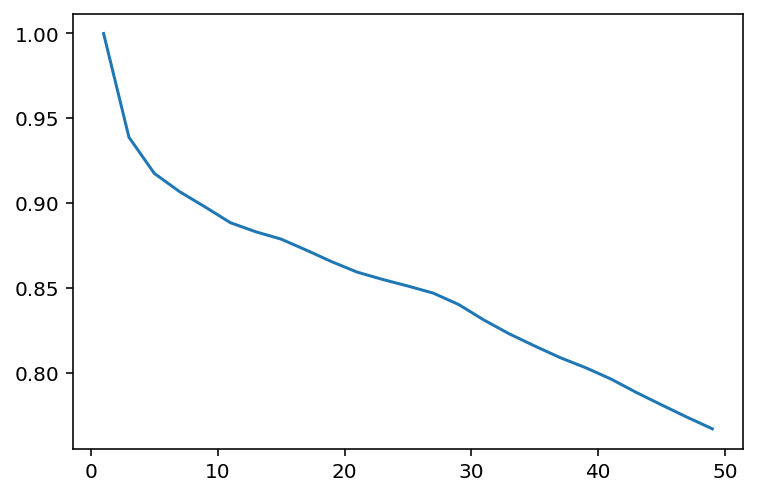

In [43]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

В&nbsp;целом результат ожидаемый&nbsp;— чем больше обученных моделей, тем лучше.

На&nbsp;тестовом наборе данных картина похожа:

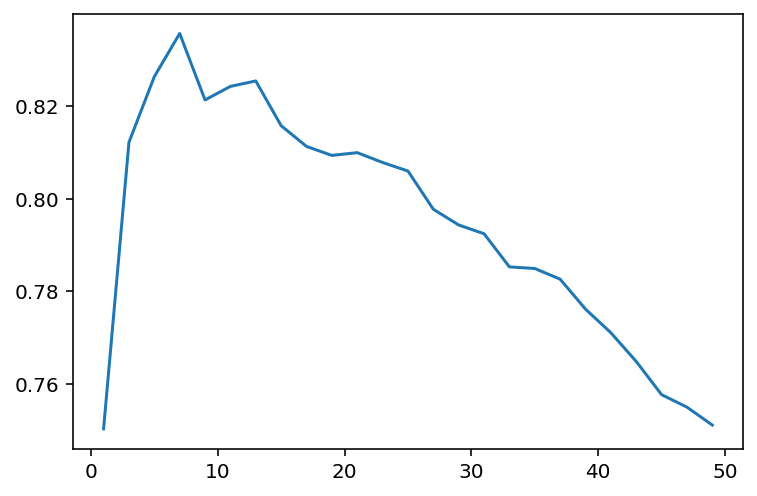

In [44]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

Видно, что наилучший результат достигается при $k=7$.


In [46]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 0.25478754578754587
median_absolute_error: 0.2124285714285712
r2_score: 0.9226909598567912


Сравним с исходной моделью:

In [47]:
test_model(knn_5)

mean_absolute_error: 0.24464102564102566
median_absolute_error: 0.17740000000000045
r2_score: 0.9306593024167129


Здесь получили чуть-чуть больший коэффициент детерминации, но незначительно просели по&nbsp;остальным показателям. Так что делаем вывод, что коэффициент детерминации сам по&nbsp;себе не&nbsp;является идеальной метрикой, и даёт лишь общее представление о&nbsp;качестве модели.

### Дерево решений

Введем список настраиваемых параметров:

In [48]:
param_range = np.arange(1, 50, 2)
tuned_parameters = [{'max_depth': param_range}]
tuned_parameters

[{'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
         35, 37, 39, 41, 43, 45, 47, 49])}]

Запустим подбор параметра:

In [49]:
gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Проверим результаты при&nbsp;разных значения гиперпараметра на&nbsp;тренировочном наборе данных:

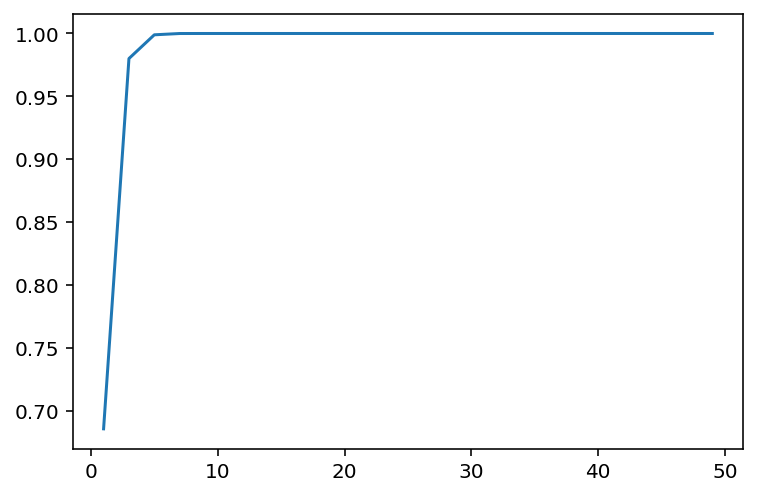

In [50]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);


В&nbsp;целом результат ожидаемый&nbsp;— чем больше обученных моделей, тем лучше.

На&nbsp;тестовом наборе данных картина похожа:

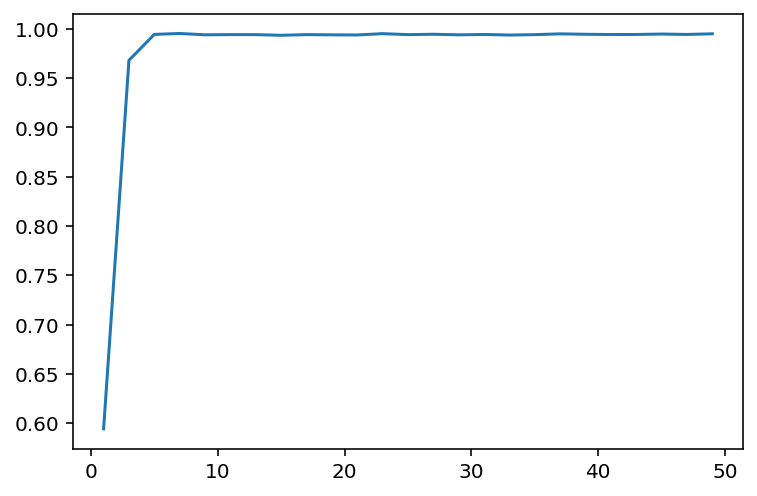

In [51]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [52]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 0.059153846153846244
median_absolute_error: 0.04499999999999993
r2_score: 0.9957024633585272


Сравним с исходной моделью:

In [53]:
test_model(dt_none)

mean_absolute_error: 0.05469230769230783
median_absolute_error: 0.04499999999999993
r2_score: 0.9953594036606157


Конкретно данная модель оказалась немного лучше, чем исходная.

### Случайный лес

Введем список настраиваемых параметров:

In [54]:
param_range = np.arange(20, 201, 20)
tuned_parameters = [{'n_estimators': param_range}]
tuned_parameters

[{'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200])}]

Запустим подбор параметра:

In [55]:
gs = GridSearchCV(RandomForestRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=120,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Проверим результаты при&nbsp;разных значения гиперпараметра на&nbsp;тренировочном наборе данных:

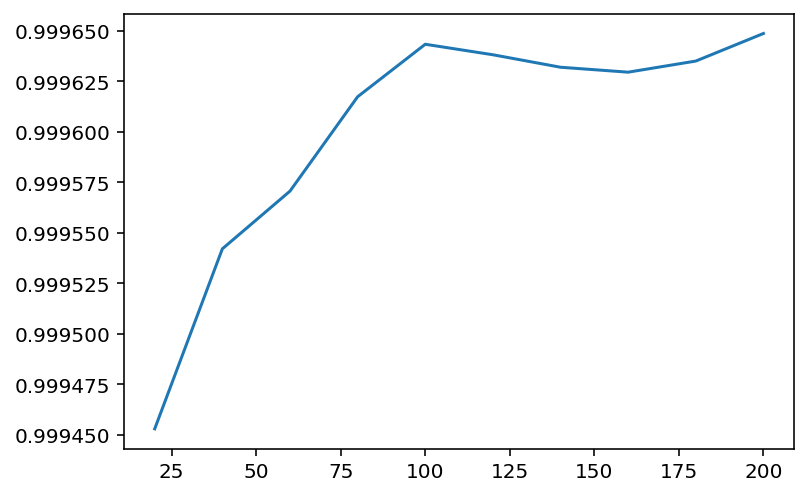

In [56]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

В&nbsp;целом результат ожидаемый&nbsp;— чем больше обученных моделей, тем лучше.

На&nbsp;тестовом наборе данных картина похожа:

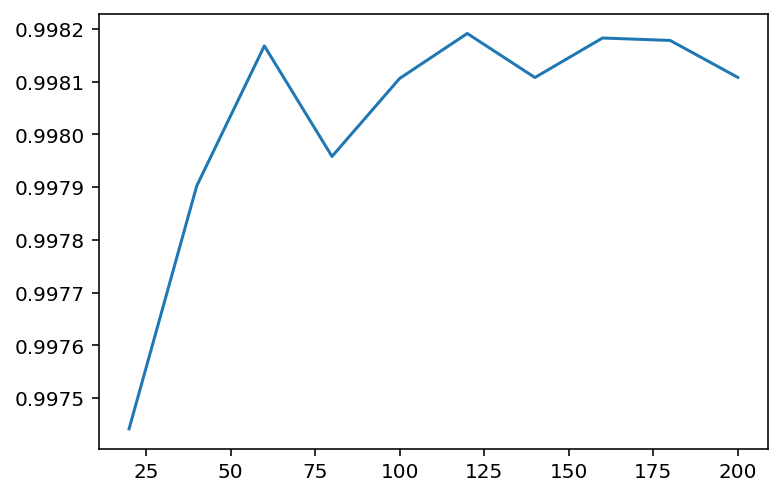

In [57]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

Из-за случайнойсти график немного плавает, но в&nbsp;целом получился чётко выраженный пик с&nbsp;наилучшим результатом.

In [58]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 0.04680491452991511
median_absolute_error: 0.021866666666666923
r2_score: 0.9938545758601351


Сравним с исходной моделью:

In [59]:
test_model(ran_100)

mean_absolute_error: 0.04296871794871819
median_absolute_error: 0.01954999999999707
r2_score: 0.9945336334542555


Данная модель также оказалась лишь немного лучше, чем исходная.

# Выводы

Все построенные модели обладают очень хорошими показателями. Ансамблевая модель при&nbsp;этом обладает наилучшими характеристиками. Таким образом для&nbsp;дальнейшей работы стоит использовать именно ее.